Инициализация необходимых библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Дано

In [2]:
gamma_0 = 7/5
rho_0 = 11.37 #гр/см^3
U_0 = -2.28 * 10**4 #см/с
P_0 = 1.17928 * 10**9 #дин/см^2
gamma_3 = 7/5
rho_3 = 7.9 #гр/см^2
U_3 = 2.72 * 10**4 #см/с
P_3 = 3.04 * 10**9 #дин/cм^2

Вспомогательные замены

In [3]:
X = P_3/P_0
alpha_0 = (gamma_0+1)/(gamma_0-1)
alpha_3 = (gamma_3+1)/(gamma_3-1)
C_3 = np.sqrt(gamma_3*P_3/rho_3)
C_0 = np.sqrt(gamma_0*P_0/rho_0)
e_0 = (2*C_0**2)/(gamma_0*(gamma_0-1)*(U_3-U_0)**2)
e_3 = (2*C_3**2)/(gamma_3*(gamma_3-1)*(U_3-U_0)**2)
print("Высчитанные параметры:")
print(X,alpha_0,alpha_3,C_3,C_0,e_0,e_3)

Высчитанные параметры:
2.5778441082694528 6.000000000000001 6.000000000000001 23210.647927517875 12050.144424480379 0.20743711521547947 0.7696202531645572


Поиск коэффициентов алгебраического уравнения

In [4]:
a_0 = (alpha_0 * e_3 - alpha_3 * X * e_0) ** 2
a_1 = 2*((alpha_0*e_3-alpha_3*X*e_0)*(e_3*(1-2*alpha_0*X)-e_0*X*(X-2*alpha_3))-alpha_0*alpha_3*X*(alpha_0*e_3+alpha_3*X*e_0))
a_2 = e_3**2 * (6*alpha_0**2 * X**2 - 8*alpha_0*X + 1) - 2 * e_0 * e_3 * X * (alpha_0*alpha_3*(X**2+4*X+1)-2*(X+1)*(alpha_3+alpha_0*X)+X)+e_0**2*X**2*(6*alpha_3**2-8*alpha_3*X+X**2)+alpha_0**2*alpha_3**2*X**2 - 2 * alpha_0*X*e_3*(alpha_0*X-2*alpha_0*alpha_3*X+2*alpha_3)-2*alpha_3*X**2*e_0*(alpha_3+2*alpha_0*X-2*alpha_0*alpha_3)
a_3 = -2*X*(2*e_3**2*(alpha_0**2*X**2-3*alpha_0*X+1)+e_0*e_3*((alpha_3+alpha_0*X)*(X**2+4*X+1)-2*alpha_0*alpha_3*X*(X+1)-2*X*(X+1))+2*e_0**2*X*(X**2-3*alpha_3*X+alpha_3**2)-alpha_0*alpha_3*X*(alpha_0*X+alpha_3)+e_3*(alpha_0**2*alpha_3*X**2-2*X*(2*alpha_0*alpha_3+alpha_0**2*X)+(2*alpha_0*X+alpha_3))+e_0*X*(alpha_0*alpha_3**2-2*alpha_3*(alpha_3+2*alpha_0*X)+2*alpha_3*X+alpha_0*X**2))
a_4 = X**2 * (e_3**2 * (alpha_0**2 * X**2 - 8 * alpha_0 * X+6)-2 * e_0 * e_3 * (alpha_0 * alpha_3 * X - 2 * (X+1) * (alpha_3 + alpha_0 * X) + X**2 + 4 * X + 1) + e_0**2 * (alpha_3**2 - 8 * alpha_3 * X +6 * X**2) + (alpha_3**2 + 4*alpha_3*alpha_0*X + alpha_0**2*X**2)-2*e_3*((alpha_0**2*X+2*alpha_0*alpha_3)*X-2*(2*alpha_0*X+alpha_3)+1)-2*e_0*(alpha_3*(2*alpha_0*X+alpha_3)-2*X*(2*alpha_3+alpha_0*X)+X**2))
a_5 = 2*X**3*(e_3**2*(alpha_0*X-2)-e_0*e_3*(alpha_0*X-2+alpha_3-2*X)+e_0**2*(alpha_3-2*X)+(alpha_3+alpha_0*X)-e_3*(2*alpha_0*X+alpha_3-2)-e_0*(2*alpha_3+alpha_0*X-2*X))
a_6 = X**4*((e_3-e_0)**2+1-2*(e_3+e_0))   
coefficients = np.array([a_0,a_1,a_2,a_3,a_4,a_5,a_6])
print("Коэффициенты алгебраического уравнения:")
print(a_0)
print(a_1)
print(a_2)
print(a_3)
print(a_4)
print(a_5)
print(a_6)

Коэффициенты алгебраического уравнения:
1.9860651780861551
-1503.3061785029313
13355.218303070611
7296.683810996609
1012.2080473147246
-147.96830984342134
-28.176784248159827


Расположение корней алгебраического уравнения

In [9]:
A = np.max(np.abs(coefficients[1:]))
B = np.max(np.abs(coefficients[:-1]))
print("Все корни расположены в области:")
print(f"{np.abs(coefficients[-1])/(np.abs(coefficients[-1])+B)} < |z| < {1+A/np.abs(coefficients[0])}")

Все корни расположены в области:
0.002105353990099142 < |z| < 6725.461236433432


Нахождение корней алгебраического уравнения


Верхнюю границу массива X следует делать под себя (нехватка памяти или потеря точности)

Значение №1453: Y = 0.14535
Значение №95207: Y = 9.52075
Значение №7479295: Y = 747.9295500000001


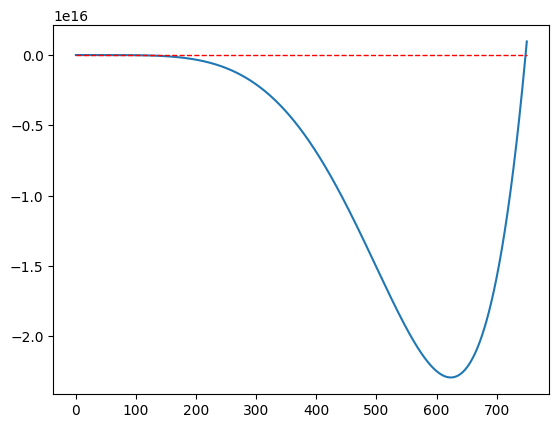

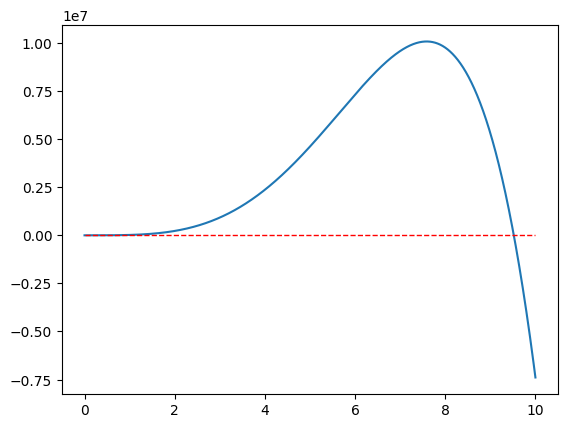

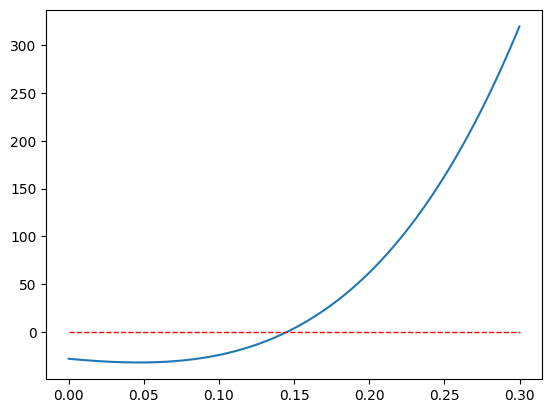

In [ ]:
x = np.arange(0,750,0.0001)
y = np.polyval(coefficients,x)
solutions=np.array([])

for i in range (x.size-1):
    if (y[i]*y[i+1]<0):
        Y=(x[i]+x[i+1])/2
        print(f"Значение №{i}: Y = {Y}")
        solutions=np.append(solutions,Y)

plt.plot(x,y)
plt.plot([0,750],[0,0],linestyle='--',linewidth=1,color='red')
plt.show()

plt.plot(x[0:100000],y[0:100000])
plt.plot([0,10],[0,0],linestyle='--',linewidth=1,color='red')
plt.show()

plt.plot(x[0:3000],y[0:3000])
plt.plot([0,0.3],[0,0],linestyle='--',linewidth=1,color='red')
plt.show()

Подстановка найденных решений в исходную систему: 

In [21]:
n=1
for i in range (solutions.size):
    Y = solutions[i]
    print(f"Решение №{n}:  Y={Y}")
    print(f"Первое вычисление:")
    P_2 = P_1 = Y * P_0
    U_2 = U_1 = U_0 - ((Y-1)*C_0*np.sqrt(2))/np.sqrt(gamma_0*(gamma_0-1)*(1+Y*alpha_0))
    D_0 = (P_1-P_0-rho_0*U_0**2+rho_0*U_0*U_1)/(rho_0*U_1-rho_0*U_0)
    rho_1 = (rho_0*(U_0-D_0))/(U_1-D_0)
    D_3 = (P_3-P_2+rho_3*U_3**2-rho_3*U_3*U_3)/(rho_3*U_3-rho_3*U_2)
    rho_2 = (rho_3*(U_3-D_3))/(U_2-D_3)
    print(f"P_2 = P_1 = {P_2}")
    print(f"U_2 = U_1 = {U_2}")
    print(f"D_0 = {D_0}")
    print(f"D_3 = {D_3}")
    print(f"rho_1 = {rho_1}")
    print(f"rho_2 = {rho_2} \n ")

    print("Второе вычисление:")
    P_2 = P_1 = Y * P_0
    U_2 = U_1 = U_0 + ((Y-1)*C_0*np.sqrt(2))/np.sqrt(gamma_0*(gamma_0-1)*(1+Y*alpha_0))
    D_0 = (P_1-P_0-rho_0*U_0**2+rho_0*U_0*U_1)/(rho_0*U_1-rho_0*U_0)
    rho_1 = (rho_0*(U_0-D_0))/(U_1-D_0)
    D_3 = (P_3-P_2+rho_3*U_3**2-rho_3*U_3*U_3)/(rho_3*U_3-rho_3*U_2)
    rho_2 = (rho_3*(U_3-D_3))/(U_2-D_3)
    print(f"P_2 = P_1 = {P_2}")
    print(f"U_2 = U_1 = {U_2}")
    print(f"D_0 = {D_0}")
    print(f"D_3 = {D_3}")
    print(f"rho_1 = {rho_1}")
    print(f"rho_2 = {rho_2} \n")
    print("=========================================================== \n")
    n=n+1


Решение №1:  Y=0.14535
Первое вычисление:
P_2 = P_1 = 171408348.0
U_2 = U_1 = -8575.49993030447
D_0 = -29031.717447019713
D_3 = 10149.763610548149
rho_1 = 3.4637208621152586
rho_2 = -7.193322923482683 
 
Второе вычисление:
P_2 = P_1 = 171408348.0
U_2 = U_1 = -37024.500069695525
D_0 = -16568.282552980287
D_3 = 5653.806054507659
rho_1 = 3.4637208621152555
rho_2 = -3.9883244586611974 


Решение №2:  Y=9.52075
Первое вычисление:
P_2 = P_1 = 11227630060.0
U_2 = U_1 = -48251.386413399945
D_0 = -57523.44827827751
D_3 = -13736.114306447882
rho_1 = 42.58013079264853
rho_2 = -9.3696292475643 
 
Второе вычисление:
P_2 = P_1 = 11227630060.0
U_2 = U_1 = 2651.3864133999523
D_0 = 11923.448278277509
D_3 = -42218.63139840035
rho_1 = 42.580130792648546
rho_2 = 12.222129938694565 


Решение №3:  Y=747.9295500000001
Первое вычисление:
P_2 = P_1 = 882018359724.0001
U_2 = U_1 = -276685.8655736734
D_0 = -327938.9071445471
D_3 = -366134.4475476854
rho_1 = 67.69216553589129
rho_2 = 34.73886412787972 
 
Второе 